In [2]:
import pandas as pd
import numpy as np

## Features

1. `age` (numeric)
2. `job`: type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services") 
3. `marital` : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. `education` (categorical: "unknown","secondary","primary","tertiary")
5. `default`: has credit in default? (binary: "yes","no")
6. `balance`: average yearly balance, in euros (numeric) 
7. `housing`: has housing loan? (binary: "yes","no")
8. `loan`: has personal loan? (binary: "yes","no") related with the last contact of the current campaign:
9. `contact`: contact communication type (categorical: "unknown","telephone","cellular") 
10. `day`: last contact day of the month (numeric)
11. `month`: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. `duration`: last contact duration, in seconds (numeric)
13. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. `previous`: number of contacts performed before this campaign and for this client (numeric)
16. `poutcome`: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


In [3]:
data = pd.read_csv('./bank/bank-full.csv', sep=";")

data['y'] = np.where(data['y'] == 'no', 0, 1)

## Question

What is the `age` distribution in the dataset.

Mean:  40.93621021432837
Median:  39.0
Std:  10.61876204097542
Mode:  32
Quantiles:  [33.0, 39.0, 48.0]


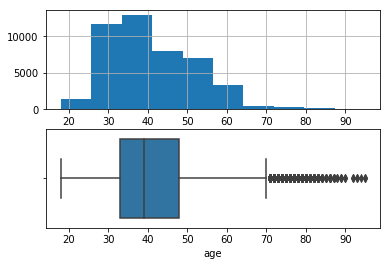

In [28]:
import seaborn as sns

age = data['age']

print('Mean: ', age.mean())
print('Median: ', age.median())
print('Std: ', age.std())
print('Mode: ', age.mode()[0])
print('Quantiles: ', age.quantile([0.25, 0.5, 0.75]).values.tolist())

plt.subplot(2, 1, 1)
age.hist()

plt.subplot(2, 1, 2)
sns.boxplot(age)


## Question

What is the distribution of `balance`

Mean:  1362.2720576850766
Median:  448.0
Std:  3044.765829168518
Mode:  0
Quantiles:  [72.0, 448.0, 1428.0]


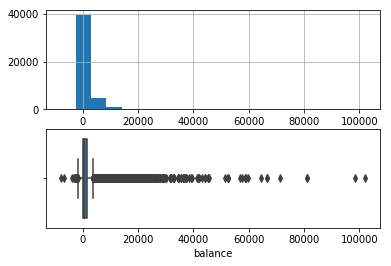

In [29]:
balance = data['balance']

print('Mean: ', balance.mean())
print('Median: ', balance.median())
print('Std: ', balance.std())
print('Mode: ', balance.mode()[0])
print('Quantiles: ', balance.quantile([0.25, 0.5, 0.75]).values.tolist())

plt.subplot(2, 1, 1)
balance.hist(bins=20)

plt.subplot(2, 1, 2)
sns.boxplot(balance)

## Question

Are there systematic differences in `y` when people have different occupation.


admin.  blue-collar  entrepreneur  housemaid  management  retired  \
0    4540         9024          1364       1131        8157     1748   
1     631          708           123        109        1301      516   

   self-employed  services  student  technician  unemployed  unknown  
0           1392      3785      669        6757        1101      254  
1            187       369      269         840         202       34  


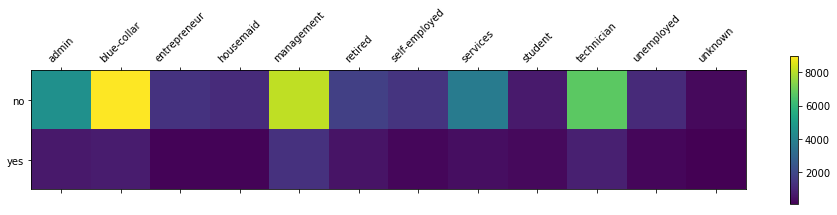

In [30]:
import matplotlib.pyplot as plt

corr = {}

for val in np.unique(data['job']):

    corr[val] = {
        0: data['job'][(data['y'] == 0) & (data['job'] == val)].count(),
        1: data['job'][(data['y'] == 1) & (data['job'] == val)].count()
    }

corr = pd.DataFrame(corr)
print(corr)

plt.matshow(corr.values, cmap='viridis')
plt.xticks(range(corr.shape[1]), ['admin', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'], rotation=45)
plt.yticks([0, 1], ['no', 'yes'])
plt.colorbar()
plt.tight_layout()
plt.show()

have_job  no_job
0     34758    5164
1      4081    1208


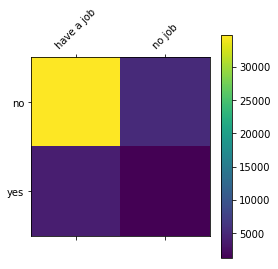

In [31]:
have_a_job = ['admin.',	'blue-collar', 'entrepreneur', 'housemaid', 'management', 'services', 'technician']
others = ['retired', 'self-employed', 'student', 'unemployed', 'unknown']

job_table = {
    'have_job': {0: corr[have_a_job].iloc[0, :].sum(),
                 1: corr[have_a_job].iloc[1, :].sum()},
    'no_job': {0: corr[others].iloc[0, :].sum(),
               1: corr[others].iloc[1, :].sum()}
} 

job_table = pd.DataFrame(job_table)

print(job_table)

plt.matshow(job_table.values, cmap='viridis')
plt.xticks(range(job_table.shape[1]), ['have a job', 'no job'], rotation=45)
plt.yticks([0, 1], ['no', 'yes'])
plt.colorbar()
plt.tight_layout()
plt.show()

In [32]:
from scipy.stats import chi2_contingency

chi2, p, _, _ = chi2_contingency(job_table)
print(chi2, p)

377.59264966742376 4.159906483342125e-84


## Question

Which variable contrib most to predict `y`

In [26]:
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [33]:
import statsmodels.api as sm

m_sub = sm.formula.logit(formula = 'y ~ age + job + marital + education + default + balance + housing + loan + contact + day + month + duration + campaign + pdays + previous + poutcome', data = data)
multi_reg = m_sub.fit()
summary = multi_reg.summary()



Optimization terminated successfully.
         Current function value: 0.238463
         Iterations 8


In [34]:
with open('summary.txt', 'w') as file:
    file.write(summary.as_csv())